In [145]:
#import autograd.numpy as np
import numpy as np
from autograd import grad

import matplotlib.pyplot as plt

from math import sin, cos, tan, atan

## Manual simulation using Euler discretization

Text(0, 0.5, 'y')

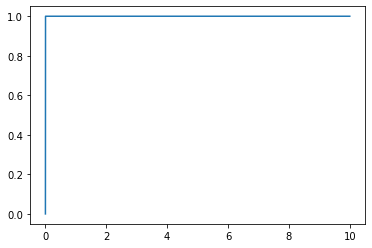

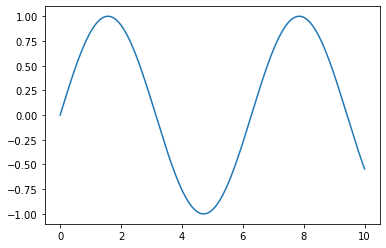

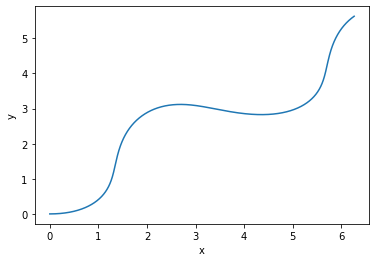

In [146]:
# init experiment
t_start = 0
t_end = 10
t_step = 0.00001
ts = np.arange(t_start,t_end,t_step)
n = len(ts)

# parameters
lf = 1
lr = 1

# input
aa = np.ones(n)
dfs = np.sin(ts)
#dfs = np.ones(n)*(np.pi / 4)

# state
xs = np.zeros(n)
ys = np.zeros(n)
psis = np.zeros(n)
vs = np.zeros(n)
betas = np.zeros(n)

for idx,t in enumerate(ts[:-1]):
    
    # unpack
    x = xs[idx]
    y = ys[idx]
    psi = psis[idx]
    v = vs[idx]
    df = dfs[idx]
    a = aa[idx]
    
    # beta
    beta = atan((lr/(lf+lr))*tan(df))    
    
    
    # calculate derivates
    xd = v*cos(psi+beta)
    yd = v*sin(psi+beta)
    psid = (v/lr)*sin(beta)
    vp = a

    # update using euler
    x = x + xd*t_step
    y = y + yd*t_step
    psi = psi + psid*t_step
    v = 1 #v + vp*t_step
    
    # repack
    xs[idx+1] = x
    ys[idx+1] = y
    psis[idx+1] = psi
    vs[idx+1] = v
    
# plotting
plt.figure()
plt.plot(ts,vs)


plt.figure()
plt.plot(ts,dfs)


plt.figure('xy')
plt.plot(xs,ys)
plt.xlabel('x')
plt.ylabel('y')

# Using scikit solver

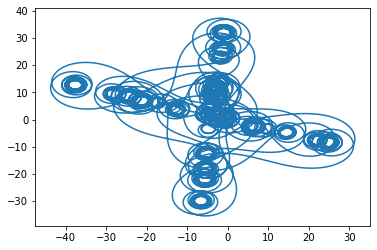

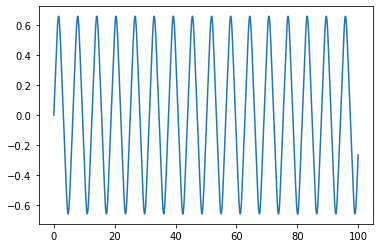

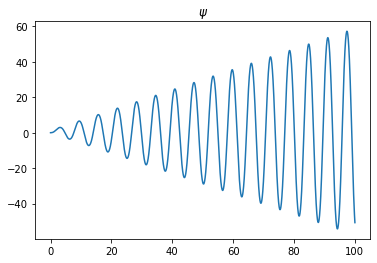

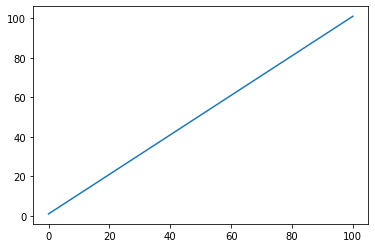

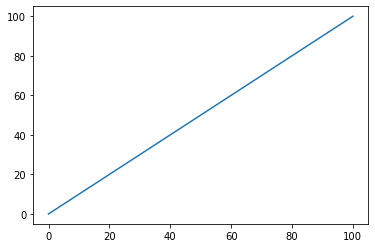

In [196]:
from scipy.integrate import odeint


# init experiment
t_start = 0
t_end = 100
t_step = 0.00001
ts = np.arange(t_start,t_end,t_step)
n = len(ts)


h0 = [0.,0.,0.,1]

a = 1
delta_f = 0

lr = 1.
lf = 1.

betas = {}

def diff(X,t):
    
    (x,y,psi,v) = X
    
    delta_f = sin(t)
    
    beta = atan((lr/(lf+lr))*tan(delta_f))
    betas[t] = beta
    
    xd = v*cos(psi+beta)
    yd = v*sin(psi+beta)
    psid = (v/lr)*sin(beta)
    vd = a
    return (xd,yd,psid,vd)

res = odeint(diff, h0, ts)

x = res[:,0]
y = res[:,1]
psi = res[:,2]
v = res[:,3]

plt.figure('position')
plt.plot(x,y)

plt.figure()


pairs = [(v,k) for v,k in betas.items()]
pairs = np.array(pairs)
plt.plot(pairs[:,0],pairs[:,1])

plt.figure('psi')
plt.plot(ts,psi)
plt.title('$\psi$')

plt.figure('velocity')
plt.plot(ts,v)

plt.figure('time')
plt.plot(ts,ts)

In [192]:
pairs.shape

(152, 2)

In [163]:
res[:,1].shape

(1000000,)